In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
orig_df = pd.read_csv("../BRFSS_2020_DATA.csv", low_memory=False)

# Cleaning:

In [4]:
orig_df.isna().sum()

STATE FIPS CODE                                                                                                               0
FILE MONTH                                                                                                                    0
INTERVIEW DATE                                                                                                                0
INTERVIEW MONTH                                                                                                               0
INTERVIEW DAY                                                                                                                 0
                                                                                                                          ...  
RESPONDENTS AGED 50-75 WHO HAVE HAD A STOOL DNA TEST WITHIN THE PAST THREE YEARS                                         225601
RESPONDENTS AGED 50-75 WHO HAVE HAD A VIRTUAL COLONOSCOPY WITHIN THE PAST FIVE YEARS                    

#### Check columns that will be removed by criteria (must have at least 300k not nulls): 

In [5]:
temp = (orig_df.isna().sum()>(401958-300000))
list(temp[temp==True].index)

['CORRECT TELEPHONE NUMBER?',
 'PRIVATE RESIDENCE?',
 'DO YOU LIVE IN COLLEGE HOUSING?',
 'RESIDENT OF STATE',
 'CELLULAR TELEPHONE',
 'ARE YOU 18 YEARS OF AGE OR OLDER?',
 'ARE YOU MALE OR FEMALE?',
 'NUMBER OF ADULTS IN HOUSEHOLD',
 'ARE YOU MALE OR FEMALE?.1',
 'NUMBER OF ADULT MEN IN HOUSEHOLD',
 'NUMBER OF ADULT WOMEN IN HOUSEHOLD',
 'RESPONDENT SELECTION',
 'SAFE TIME TO TALK?',
 'CORRECT PHONE NUMBER?',
 'IS THIS A CELL PHONE?',
 'ARE YOU 18 YEARS OF AGE OR OLDER?.1',
 'ARE YOU MALE OR FEMALE?.2',
 'DO YOU LIVE IN A PRIVATE RESIDENCE?',
 'DO YOU LIVE IN COLLEGE HOUSING?.1',
 'DO YOU CURRENTLY LIVE IN  ____(STATE)____?',
 'DO YOU ALSO HAVE A LANDLINE TELEPHONE?',
 'NUMBER OF ADULTS IN HOUSEHOLD.1',
 'POOR PHYSICAL OR MENTAL HEALTH',
 'STILL HAVE ASTHMA',
 'AGE WHEN TOLD DIABETES',
 'HOUSEHOLD TELEPHONES',
 'RESIDENTIAL PHONES',
 'PREGNANCY STATUS',
 'FREQUENCY OF DAYS NOW SMOKING',
 'STOPPED SMOKING IN PAST 12 MONTHS',
 'INTERVAL SINCE LAST SMOKED',
 'AVG ALCOHOLIC DRINKS PER DAY

#### Check few potential columns from the list above. May be we can work with them? 

In [6]:
orig_df[[
'EVER BEEN TOLD YOU HAVE PRE-DIABETES OR BORDERLINE DIABETES',
'TOLD HAD HEPATITIS C',
'TOLD  HAD HEPATITIS B',
'HOW OLD WHEN YOU FIRST STARTED SMOKING?',
'HOW OLD WHEN YOU LAST SMOKED?',
'ON AVERAGE, HOW MANY CIGARETTES DO YOU SMOKE EACH DAY?',
'POOR PHYSICAL OR MENTAL HEALTH',
]].isna().sum()

EVER BEEN TOLD YOU HAVE PRE-DIABETES OR BORDERLINE DIABETES    182965
TOLD HAD HEPATITIS C                                           383151
TOLD  HAD HEPATITIS B                                          383186
HOW OLD WHEN YOU FIRST STARTED SMOKING?                        387914
HOW OLD WHEN YOU LAST SMOKED?                                  388332
ON AVERAGE, HOW MANY CIGARETTES DO YOU SMOKE EACH DAY?         388351
POOR PHYSICAL OR MENTAL HEALTH                                 200343
dtype: int64

#### To preserve most of the rows, we'll remove all columns with that threshhold: 

In [7]:
clean_df_1 = orig_df.dropna(axis=1, thresh=300000)
clean_df_1.shape

(401958, 112)

In [8]:
list(clean_df_1.columns)

['STATE FIPS CODE',
 'FILE MONTH',
 'INTERVIEW DATE',
 'INTERVIEW MONTH',
 'INTERVIEW DAY',
 'INTERVIEW YEAR',
 'FINAL DISPOSITION',
 'ANNUAL SEQUENCE NUMBER',
 'PRIMARY SAMPLING UNIT',
 'SEX OF RESPONDENT',
 'GENERAL HEALTH',
 'NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD',
 'NUMBER OF DAYS MENTAL HEALTH NOT GOOD',
 'HAVE ANY HEALTH CARE COVERAGE',
 'MULTIPLE HEALTH CARE PROFESSIONALS',
 'COULD NOT SEE DR. BECAUSE OF COST',
 'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
 'EXERCISE IN PAST 30 DAYS',
 'HOW MUCH TIME DO YOU SLEEP',
 'EVER DIAGNOSED WITH HEART ATTACK',
 'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE',
 'EVER DIAGNOSED WITH A STROKE',
 'EVER TOLD HAD ASTHMA',
 '(EVER TOLD) YOU HAD SKIN CANCER?',
 '(EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?',
 '(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?',
 'TOLD HAVE ARTHRITIS',
 '(EVER TOLD) YOU HAD A DEPRESSIVE DISORDER',
 'EVER TOLD YOU HAVE KIDNEY DISEASE?',
 '(EVER TOLD) YOU 

In [9]:
clean_df_1.isna().sum()

STATE FIPS CODE                                       0
FILE MONTH                                            0
INTERVIEW DATE                                        0
INTERVIEW MONTH                                       0
INTERVIEW DAY                                         0
                                                  ...  
HEAVY ALCOHOL CONSUMPTION  CALCULATED VARIABLE        0
ALWAYS OR NEARLY ALWAYS WEAR SEAT BELTS               0
ALWAYS WEAR SEAT BELTS                                0
DRINKING AND DRIVING                                  0
EVER BEEN TESTED FOR HIV CALCULATED VARIABLE      34037
Length: 112, dtype: int64

#### Looks like these columns are not very inetersting to us, we'll remove them too:

In [10]:
columns_to_remove = [
 'STATE FIPS CODE',
 'FILE MONTH',
 'INTERVIEW DATE',
 'INTERVIEW MONTH',
 'INTERVIEW DAY',
 'INTERVIEW YEAR',
 'FINAL DISPOSITION',
 'ANNUAL SEQUENCE NUMBER',
 'PRIMARY SAMPLING UNIT',
 'HAVE ANY HEALTH CARE COVERAGE',
 'MULTIPLE HEALTH CARE PROFESSIONALS',
 'COULD NOT SEE DR. BECAUSE OF COST',
 'LAST VISITED DENTIST OR DENTAL CLINIC',
 'NUMBER OF PERMANENT TEETH REMOVED',
 'MARITAL STATUS',
 'EDUCATION LEVEL',
 'OWN OR RENT HOME',
 'DO YOU HAVE A CELL PHONE FOR PERSONAL USE?',
 'ARE YOU A VETERAN',
 'EMPLOYMENT STATUS',
 'NUMBER OF CHILDREN IN HOUSEHOLD',
 'INCOME LEVEL',
 'ARE YOU DEAF OR DO YOU HAVE SERIOUS DIFFICULTY HEARING?',
 'BLIND OR DIFFICULTY SEEING',
 'DIFFICULTY CONCENTRATING OR REMEMBERING',
 'DIFFICULTY WALKING OR CLIMBING STAIRS',
 'DIFFICULTY DRESSING OR BATHING',
 'DIFFICULTY DOING ERRANDS ALONE',
 'ADULT FLU SHOT/SPRAY PAST 12 MOS',
 'PNEUMONIA SHOT EVER',
 'HOW OFTEN USE SEATBELTS IN CAR?',
 'EVER TESTED H.I.V.',
 'DO ANY HIGH RISK SITUATIONS APPLY',
 'QUESTIONNAIRE VERSION IDENTIFIER',
 'LANGUAGE IDENTIFIER',
 'METROPOLITAN STATUS',
 'URBAN/RURAL STATUS',
 'SAMPLE DESIGN STRATIFICATION VARIABLE',
 'STRATUM WEIGHT',
 'RAW WEIGHTING FACTOR USED IN RAKING',
 'DESIGN WEIGHT USED IN RAKING',
 'IMPUTED RACE/ETHNICITY VALUE',
 'DUAL PHONE USE CATEGORIES',
 'TRUNCATED DESIGN WEIGHT USED IN ADULT COMBINED LAN  LINE AND CELL PHONE RAKING',
 'FINAL WEIGHT: LAND-LINE AND CELL-PHONE DATA',
 'RESPONDENTS AGED 18-64 WITH HEALTH CARE COVERAGE',
 'RISK FACTOR FOR HAVING HAD PERMANENT TEETH EXTRACTED',
 'ADULTS WHO HAVE VISITED A DENTIST, DENTAL HYGENIST OR DENTAL CLINIC WITHIN THE PAST YEAR',
 'COMPUTED PREFERRED RACE',
 'CALCULATED NON-HISPANIC RACE INCLUDING MULTIRACIAL',
 'HISPANIC, LATINO/A, OR SPANISH ORIGIN CALCULATED VARIABLE',
 'COMPUTED RACE-ETHNICITY GROUPING',
 'COMPUTED NON-HISPANIC WHITES/ALL OTHERS RACE CATEGORIES RACE/ETHNIC GROUP CODES USED IN POST-STRATIFICATION.',
 'COMPUTED FIVE LEVEL RACE/ETHNICITY CATEGORY.',
 'COMPUTED RACE GROUPS USED FOR INTERNET PREVALENCE TABLES',
 'CALCULATED SEX VARIABLE',
 'COMPUTED HEIGHT IN INCHES',
 'COMPUTED HEIGHT IN METERS',
 'COMPUTED WEIGHT IN KILOGRAMS',
 'COMPUTED NUMBER OF CHILDREN IN HOUSEHOLD',
 'COMPUTED LEVEL OF EDUCATION COMPLETED CATEGORIES',
 'COMPUTED INCOME CATEGORIES',
 'CURRENT SMOKING CALCULATED VARIABLE',
 'ALWAYS OR NEARLY ALWAYS WEAR SEAT BELTS',
 'ALWAYS WEAR SEAT BELTS',
 'DRINKING AND DRIVING'
]

In [11]:
clean_df_2 = clean_df_1.drop(columns_to_remove, axis=1)
clean_df_2.shape

(401958, 46)

In [12]:
clean_df_2.isna().sum()

SEX OF RESPONDENT                                                                                            0
GENERAL HEALTH                                                                                               8
NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD                                                                      5
NUMBER OF DAYS MENTAL HEALTH NOT GOOD                                                                        5
LENGTH OF TIME SINCE LAST ROUTINE CHECKUP                                                                    5
EXERCISE IN PAST 30 DAYS                                                                                     3
HOW MUCH TIME DO YOU SLEEP                                                                                   3
EVER DIAGNOSED WITH HEART ATTACK                                                                             6
EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE                                                         3
E

#### Remove rows with nulls:

In [ ]:
clean_df_3 = clean_df_2.dropna()
clean_df_3.shape

(336836, 46)

#### We are left with those features:

In [ ]:
list(clean_df_3.columns)

['SEX OF RESPONDENT',
 'GENERAL HEALTH',
 'NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD',
 'NUMBER OF DAYS MENTAL HEALTH NOT GOOD',
 'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
 'EXERCISE IN PAST 30 DAYS',
 'HOW MUCH TIME DO YOU SLEEP',
 'EVER DIAGNOSED WITH HEART ATTACK',
 'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE',
 'EVER DIAGNOSED WITH A STROKE',
 'EVER TOLD HAD ASTHMA',
 '(EVER TOLD) YOU HAD SKIN CANCER?',
 '(EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?',
 '(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?',
 'TOLD HAVE ARTHRITIS',
 '(EVER TOLD) YOU HAD A DEPRESSIVE DISORDER',
 'EVER TOLD YOU HAVE KIDNEY DISEASE?',
 '(EVER TOLD) YOU HAD DIABETES',
 'REPORTED WEIGHT IN POUNDS',
 'REPORTED HEIGHT IN FEET AND INCHES',
 'SMOKED AT LEAST 100 CIGARETTES',
 'USE OF SMOKELESS TOBACCO PRODUCTS',
 'DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE',
 'ADULTS WITH GOOD OR BETTER HEALTH',
 'COMPUTED PHYSICAL HEALTH STATUS',
 'COMPUTED MENTAL HEALT

In [ ]:
clean_df_3.head(5)

,SEX OF RESPONDENT,GENERAL HEALTH,NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD,NUMBER OF DAYS MENTAL HEALTH NOT GOOD,LENGTH OF TIME SINCE LAST ROUTINE CHECKUP,EXERCISE IN PAST 30 DAYS,HOW MUCH TIME DO YOU SLEEP,EVER DIAGNOSED WITH HEART ATTACK,EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE,EVER DIAGNOSED WITH A STROKE,...,COMPUTED BODY MASS INDEX,COMPUTED BODY MASS INDEX CATEGORIES,OVERWEIGHT OR OBESE CALCULATED VARIABLE,COMPUTED SMOKING STATUS,DRINK ANY ALCOHOLIC BEVERAGES IN PAST 30 DAYS,COMPUTED DRINK-OCCASIONS-PER-DAY,BINGE DRINKING CALCULATED VARIABLE,COMPUTED NUMBER OF DRINKS OF ALCOHOL BEVERAGES PER WEEK,HEAVY ALCOHOL CONSUMPTION CALCULATED VARIABLE,EVER BEEN TESTED FOR HIV CALCULATED VARIABLE
0,2,2.0,3.0,30.0,4.0,1.0,5.0,2.0,2.0,2.0,...,1660.0,1.0,1,1,2,0,1,0,1,1.0
4,2,2.0,88.0,88.0,1.0,1.0,7.0,2.0,2.0,1.0,...,2034.0,2.0,1,4,2,0,1,0,1,9.0
5,1,4.0,20.0,30.0,2.0,1.0,8.0,2.0,2.0,2.0,...,2658.0,3.0,2,3,2,0,1,0,1,1.0
6,2,3.0,88.0,88.0,1.0,2.0,6.0,2.0,2.0,2.0,...,2421.0,2.0,1,4,2,0,1,0,1,2.0
8,2,2.0,28.0,88.0,1.0,1.0,8.0,2.0,2.0,2.0,...,2371.0,2.0,1,4,2,0,1,0,1,2.0


In [ ]:
clean_df_3[['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE']].max()

REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE    14
dtype: int64

# EDA

In [ ]:
corr_ = clean_df_3.corr()

In [ ]:
corr_['EVER DIAGNOSED WITH HEART ATTACK'].sort_values()

GENERAL HEALTH                                                                                          -0.152334
IMPUTED AGE VALUE COLLAPSED ABOVE 80                                                                    -0.142927
REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE                                            -0.140635
IMPUTED AGE IN SIX GROUPS                                                                               -0.133431
REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE                                                      -0.118139
ADULTS WITH GOOD OR BETTER HEALTH                                                                       -0.107151
COMPUTED PHYSICAL HEALTH STATUS                                                                         -0.065261
EXERCISE IN PAST 30 DAYS                                                                                -0.060107
DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE                                                  

In [ ]:
corr_['EVER TOLD HAD ASTHMA'].sort_values()

GENERAL HEALTH                                                                                          -0.095011
LIFETIME ASTHMA CALCULATED VARIABLE                                                                     -0.084089
COMPUTED BODY MASS INDEX                                                                                -0.071663
ADULTS WITH GOOD OR BETTER HEALTH                                                                       -0.062501
SEX OF RESPONDENT                                                                                       -0.056349
COMPUTED PHYSICAL HEALTH STATUS                                                                         -0.053424
COMPUTED BODY MASS INDEX CATEGORIES                                                                     -0.052530
COMPUTED MENTAL HEALTH STATUS                                                                           -0.045511
OVERWEIGHT OR OBESE CALCULATED VARIABLE                                                 

In [ ]:
corr_['RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)'].sort_values()


GENERAL HEALTH                                                                                          -0.243042
IMPUTED AGE VALUE COLLAPSED ABOVE 80                                                                    -0.232413
REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE                                            -0.228889
IMPUTED AGE IN SIX GROUPS                                                                               -0.215010
REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE                                                      -0.196237
ADULTS WITH GOOD OR BETTER HEALTH                                                                       -0.174285
COMPUTED PHYSICAL HEALTH STATUS                                                                         -0.112851
EXERCISE IN PAST 30 DAYS                                                                                -0.093529
LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE                                      

In [ ]:
corr_['(EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?'].sort_values()



# (EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?                                                           0.037283
# (EVER TOLD) YOU HAD SKIN CANCER?
# 


IMPUTED AGE VALUE COLLAPSED ABOVE 80                                                                    -0.173479
REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE                                            -0.168571
IMPUTED AGE IN SIX GROUPS                                                                               -0.162385
REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE                                                      -0.148505
GENERAL HEALTH                                                                                          -0.094533
ADULTS WITH GOOD OR BETTER HEALTH                                                                       -0.057889
COMPUTED PHYSICAL HEALTH STATUS                                                                         -0.040669
SEX OF RESPONDENT                                                                                       -0.033169
DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE                                                  

In [ ]:
corr_['TOLD HAVE ARTHRITIS'].sort_values()

IMPUTED AGE VALUE COLLAPSED ABOVE 80                                                                    -0.376099
IMPUTED AGE IN SIX GROUPS                                                                               -0.367077
REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE                                            -0.366634
GENERAL HEALTH                                                                                          -0.292586
REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE                                                      -0.279287
ADULTS WITH GOOD OR BETTER HEALTH                                                                       -0.182637
COMPUTED PHYSICAL HEALTH STATUS                                                                         -0.177413
COMPUTED BODY MASS INDEX                                                                                -0.133091
EXERCISE IN PAST 30 DAYS                                                                

In [ ]:
clean_df_3['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE'].describe()

count    336836.000000
mean          7.620186
std           3.627969
min           1.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          14.000000
Name: REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE, dtype: float64

In [50]:
# clean_df_3[(clean_df_3['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE']>10) AND (clean_df_3['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE']<14])]

clean_df_3.query('`REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE` > 10 and `REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE` < 14')

,SEX OF RESPONDENT,GENERAL HEALTH,NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD,NUMBER OF DAYS MENTAL HEALTH NOT GOOD,LENGTH OF TIME SINCE LAST ROUTINE CHECKUP,EXERCISE IN PAST 30 DAYS,HOW MUCH TIME DO YOU SLEEP,EVER DIAGNOSED WITH HEART ATTACK,EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE,EVER DIAGNOSED WITH A STROKE,...,COMPUTED BODY MASS INDEX,COMPUTED BODY MASS INDEX CATEGORIES,OVERWEIGHT OR OBESE CALCULATED VARIABLE,COMPUTED SMOKING STATUS,DRINK ANY ALCOHOLIC BEVERAGES IN PAST 30 DAYS,COMPUTED DRINK-OCCASIONS-PER-DAY,BINGE DRINKING CALCULATED VARIABLE,COMPUTED NUMBER OF DRINKS OF ALCOHOL BEVERAGES PER WEEK,HEAVY ALCOHOL CONSUMPTION CALCULATED VARIABLE,EVER BEEN TESTED FOR HIV CALCULATED VARIABLE
4,2,2.0,88.0,88.0,1.0,1.0,7.0,2.0,2.0,1.0,...,2034.0,2.0,1,4,2,0,1,0,1,9.0
6,2,3.0,88.0,88.0,1.0,2.0,6.0,2.0,2.0,2.0,...,2421.0,2.0,1,4,2,0,1,0,1,2.0
9,2,4.0,6.0,88.0,1.0,2.0,12.0,2.0,1.0,2.0,...,2887.0,3.0,2,3,2,0,1,0,1,2.0
10,2,4.0,15.0,88.0,1.0,1.0,4.0,2.0,2.0,2.0,...,2163.0,2.0,1,4,2,0,1,0,1,1.0
11,2,3.0,5.0,88.0,1.0,2.0,9.0,2.0,2.0,2.0,...,3164.0,4.0,2,3,2,0,1,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401906,2,3.0,88.0,88.0,1.0,1.0,7.0,2.0,2.0,2.0,...,2441.0,2.0,1,4,2,0,1,0,1,2.0
401926,2,3.0,88.0,88.0,2.0,1.0,8.0,2.0,1.0,2.0,...,3621.0,4.0,2,3,2,0,1,0,1,1.0
401938,2,4.0,30.0,88.0,2.0,1.0,5.0,2.0,2.0,2.0,...,2338.0,2.0,1,3,2,0,1,0,1,1.0
401944,1,3.0,88.0,88.0,1.0,1.0,6.0,2.0,2.0,2.0,...,2658.0,3.0,2,3,2,0,1,0,1,2.0


In [53]:
temp1 = clean_df_3[
(clean_df_3['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE']>=7) & 
(clean_df_3['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE']<=8)
]

In [54]:
temp1.corr()['RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)'].sort_values()


GENERAL HEALTH                                                                                          -0.237600
ADULTS WITH GOOD OR BETTER HEALTH                                                                       -0.186254
COMPUTED PHYSICAL HEALTH STATUS                                                                         -0.120473
EXERCISE IN PAST 30 DAYS                                                                                -0.096031
LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE                                                      -0.091014
DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE                                                                  -0.080584
COMPUTED MENTAL HEALTH STATUS                                                                           -0.078162
COMPUTED BODY MASS INDEX                                                                                -0.070509
LIFETIME ASTHMA CALCULATED VARIABLE                                                     

In [57]:
clean_df_3[['NUMBER OF DAYS MENTAL HEALTH NOT GOOD']].value_counts()

NUMBER OF DAYS MENTAL HEALTH NOT GOOD
88.0                                     212721
30.0                                      18541
2.0                                       16944
5.0                                       14436
10.0                                      10770
3.0                                       10740
15.0                                      10285
1.0                                        9532
7.0                                        5694
20.0                                       5610
4.0                                        5522
77.0                                       4363
14.0                                       2124
25.0                                       2028
6.0                                        1570
99.0                                       1383
8.0                                        1131
12.0                                        782
28.0                                        547
21.0                                        376
29

# HEATMAP

In [106]:
del hm_df

In [112]:
# Dataset for heatmap; exclude age group 14='No response'
hm_df = clean_df_3.query('`REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE` < 14').sort_values('REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE', ascending=True)
hm_df.shape

(333371, 46)

In [113]:
hm_df.columns.to_list()

['SEX OF RESPONDENT',
 'GENERAL HEALTH',
 'NUMBER OF DAYS PHYSICAL HEALTH NOT GOOD',
 'NUMBER OF DAYS MENTAL HEALTH NOT GOOD',
 'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',
 'EXERCISE IN PAST 30 DAYS',
 'HOW MUCH TIME DO YOU SLEEP',
 'EVER DIAGNOSED WITH HEART ATTACK',
 'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE',
 'EVER DIAGNOSED WITH A STROKE',
 'EVER TOLD HAD ASTHMA',
 '(EVER TOLD) YOU HAD SKIN CANCER?',
 '(EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?',
 '(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?',
 'TOLD HAVE ARTHRITIS',
 '(EVER TOLD) YOU HAD A DEPRESSIVE DISORDER',
 'EVER TOLD YOU HAVE KIDNEY DISEASE?',
 '(EVER TOLD) YOU HAD DIABETES',
 'REPORTED WEIGHT IN POUNDS',
 'REPORTED HEIGHT IN FEET AND INCHES',
 'SMOKED AT LEAST 100 CIGARETTES',
 'USE OF SMOKELESS TOBACCO PRODUCTS',
 'DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE',
 'ADULTS WITH GOOD OR BETTER HEALTH',
 'COMPUTED PHYSICAL HEALTH STATUS',
 'COMPUTED MENTAL HEALT

In [114]:
# Drop low-correlated and age columns
# -------------------------------------
# COMMAND: 
# hm_df.corr()['RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)'].sort_values()
# -------------------------------------
    
# DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE                                                                  -0.087862
# DRINK ANY ALCOHOLIC BEVERAGES IN PAST 30 DAYS                                                           -0.053503
# COMPUTED BODY MASS INDEX CATEGORIES                                                                     -0.051880
# COMPUTED BODY MASS INDEX                                                                                -0.049934
# OVERWEIGHT OR OBESE CALCULATED VARIABLE                                                                 -0.048001
# LIFETIME ASTHMA CALCULATED VARIABLE                                                                     -0.033576
# EVER BEEN TESTED FOR HIV CALCULATED VARIABLE                                                            -0.028132
# CURRENT ASTHMA CALCULATED VARIABLE                                                                      -0.025835
# NUMBER OF DAYS MENTAL HEALTH NOT GOOD                                                                   -0.024191
# HOW MUCH TIME DO YOU SLEEP                                                                              -0.023511
# COMPUTED MENTAL HEALTH STATUS                                                                           -0.017307
# USE OF SMOKELESS TOBACCO PRODUCTS                                                                       -0.000740
# REPORTED WEIGHT IN POUNDS                                                                                0.003866
# COMPUTED NUMBER OF DRINKS OF ALCOHOL BEVERAGES PER WEEK                                                  0.004222
# HEAVY ALCOHOL CONSUMPTION  CALCULATED VARIABLE                                                           0.009761
# COMPUTED DRINK-OCCASIONS-PER-DAY                                                                         0.011982
# REPORTED HEIGHT IN FEET AND INCHES                                                                       0.014479
# BINGE DRINKING CALCULATED VARIABLE                                                                       0.022997
# (EVER TOLD) YOU HAD A DEPRESSIVE DISORDER                                                                0.029265
# EVER TOLD HAD ASTHMA                                                                                     0.030532
# COMPUTED ASTHMA STATUS                                                                                   0.033739
# (EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?                                                           0.061262
# EVER TOLD YOU HAVE KIDNEY DISEASE?                                                                       0.062805
# COMPUTED SMOKING STATUS                                                                                  0.064381
# SEX OF RESPONDENT                                                                                        0.067621
# (EVER TOLD) YOU HAD SKIN CANCER?                                                                         0.068658
# LENGTH OF TIME SINCE LAST ROUTINE CHECKUP                                                                0.075202
# SMOKED AT LEAST 100 CIGARETTES                                                                           0.081961

hm_remove_cols = ['DAYS IN PAST 30 HAD ALCOHOLIC BEVERAGE',     
                    'DRINK ANY ALCOHOLIC BEVERAGES IN PAST 30 DAYS',     
                    'COMPUTED BODY MASS INDEX CATEGORIES',     
                    'COMPUTED BODY MASS INDEX',     
                    'OVERWEIGHT OR OBESE CALCULATED VARIABLE',     
                    'LIFETIME ASTHMA CALCULATED VARIABLE',     
                    'EVER BEEN TESTED FOR HIV CALCULATED VARIABLE',     
                    'CURRENT ASTHMA CALCULATED VARIABLE',     
                    'NUMBER OF DAYS MENTAL HEALTH NOT GOOD',     
                    'HOW MUCH TIME DO YOU SLEEP',     
                    'COMPUTED MENTAL HEALTH STATUS',     
                    'USE OF SMOKELESS TOBACCO PRODUCTS',     
                    'REPORTED WEIGHT IN POUNDS',     
                    'COMPUTED NUMBER OF DRINKS OF ALCOHOL BEVERAGES PER WEEK',     
                    'HEAVY ALCOHOL CONSUMPTION  CALCULATED VARIABLE',     
                    'COMPUTED DRINK-OCCASIONS-PER-DAY',     
                    'REPORTED HEIGHT IN FEET AND INCHES',     
                    'BINGE DRINKING CALCULATED VARIABLE',     
                    '(EVER TOLD) YOU HAD A DEPRESSIVE DISORDER',     
                    'EVER TOLD HAD ASTHMA',     
                    'COMPUTED ASTHMA STATUS',     
                    '(EVER TOLD) YOU HAD ANY OTHER TYPES OF CANCER?',     
                    'EVER TOLD YOU HAVE KIDNEY DISEASE?',     
                    'COMPUTED SMOKING STATUS',     
                    'SEX OF RESPONDENT',     
                    '(EVER TOLD) YOU HAD SKIN CANCER?',     
                    'LENGTH OF TIME SINCE LAST ROUTINE CHECKUP',     
                    'SMOKED AT LEAST 100 CIGARETTES',
                    'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE',
                    'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE',
                    'IMPUTED AGE VALUE COLLAPSED ABOVE 80',
                    'IMPUTED AGE IN SIX GROUPS'                 
                 ]

hm_df = hm_df.drop(hm_remove_cols, axis=1)
hm_df.shape

(333371, 14)

In [115]:
# rename long column names
# -------------------------
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
hm_df.rename(columns={'EVER DIAGNOSED WITH HEART ATTACK': 'DIAGNOSED WITH HEART ATTACK'
                      ,'EVER DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE': 'DIAGNOSED WITH ANGINA OR CORONARY HEART DISEASE'
                      ,'EVER DIAGNOSED WITH A STROKE': 'DIAGNOSED WITH A STROKE'
                      ,'(EVER TOLD) YOU HAD (COPD) CHRONIC OBSTRUCTIVE PULMONARY DISEASE, EMPHYSEMA OR CHRONIC BRONCHITIS?' : '(TOLD) YOU HAD COPD, EMPHYSEMA OR CHRONIC BRONCHITIS?'
                      ,'(EVER TOLD) YOU HAD DIABETES' : '(TOLD) YOU HAD DIABETES'
                      ,'LEISURE TIME PHYSICAL ACTIVITY CALCULATED VARIABLE' : 'LEISURE TIME PHYSICAL ACTIVITY'
                      ,'RESPONDENTS THAT HAVE EVER REPORTED HAVING CORONARY HEART DISEASE (CHD) OR MYOCARDIAL INFARCTION (MI)' : 'REPORTED CHD OR MI'
                      ,'RESPONDENTS DIAGNOSED WITH ARTHRITIS' : 'DIAGNOSED WITH ARTHRITIS'
                      ,'REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE' : 'AGE IN FIVE-YEAR AGE'
                      ,'REPORTED AGE IN TWO AGE GROUPS CALCULATED VARIABLE' : 'AGE IN TWO AGE GROUPS'}
                      , inplace=True)

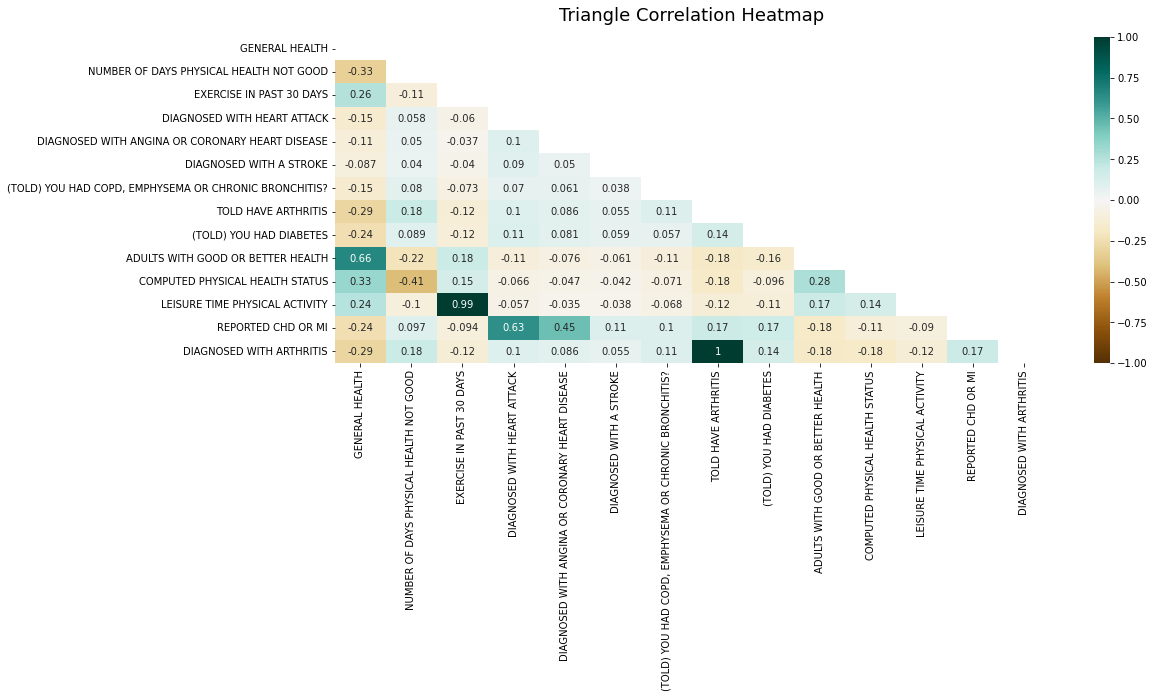

In [116]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(hm_df.corr(), dtype=bool))
heatmap = sns.heatmap(hm_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# PIE CHART

In [169]:
# Dataset for heatmap; exclude age group 14='No response'
pie_df = clean_df_3.query('`REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE` < 14').sort_values('REPORTED AGE IN FIVE-YEAR AGE CATEGORIES CALCULATED VARIABLE', ascending=True)
pie_df = clean_df_3['SEX OF RESPONDENT']
pie_df.shape

(336836,)

In [133]:
pie_df.value_counts()

2    176934
1    159902
Name: SEX OF RESPONDENT, dtype: int64

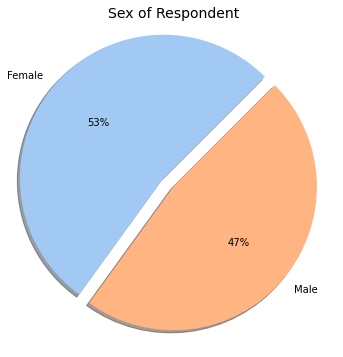

In [170]:
#define data labels
labels = ['Female', 'Male']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10, 6))
plt.pie(pie_df.value_counts(), labels = labels, colors = colors, autopct='%.0f%%' ,radius=1.1 ,shadow=True, explode=[0.1,0], startangle=45)
plt.title("Sex of Respondent", fontdict={'fontsize':14})
plt.show()